### Crossvalidation Example

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot
import numpy as np

Using TensorFlow backend.


In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X,y = utils.X_y_split(df)

### Crossvalidation on all models

In [7]:
%%capture

models = {
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None)
    ""
}
#results = {}

def Cross_Val_Models(models_dict, X, y, n_splits=5, scaler=scaler, sampling_technique=None):
    """
    Pass the dictionary of all the model you want to do the cross validation for. 
    """
    results = {}
    for model in models.keys():
        y_predicted = utils.cross_validation_average_results(models[model], X, y, n_splits,scaler,sampling_technique)
        threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.99),iterations=1000, visualization=True)
        y_pred = utils.predict_with_threshold(y_predicted,threshold)
        results[model] = utils.profit_share(y_predicted, y)
    return results

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype u

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If b

{'GaussianNB': 0.281,
 'MultinomialNB': 0.279,
 'ComplementNB': 0.318,
 'SVC': 0.421,
 'LinearSVC': 0.427,
 'LogisticRegression': 0.428,
 'SGDClassifier': 0.326,
 'KNeighborsClassifier': 0.3,
 'DecisionTreeClassifier': 0.229}

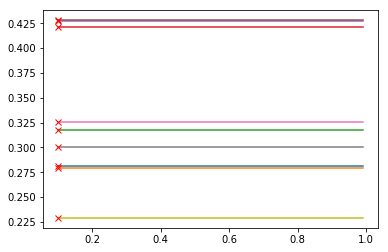

In [16]:
utils.Cross_Val_Models(models, X, y, sampling_technique=ros, scaler=scaler)

In [ ]:
utils.cross_validation_average_results(GaussianNB(), X, y, scaler=scaler, sampling_technique=ros)

In [9]:
seed=0
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=seed, ratio=0.5)
#resamp_x, resamp_y= ros.fit_resample(X_train, y_train)

In [ ]:
models = {
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None)
}

In [ ]:
utils.Cross_Val_Models(models, X, y, scaler, n_splits=5, sampling_technique=ros)

In [ ]:
utils.Cross_Val_Models(models, X, y, n_splits=5, scaler=scaler)

### Leave One out Cross Validation

In [ ]:
%%capture
for model in models.keys():
    y_predicted = utils.leave_one_out_cross_validation_average_results(models[model], X, y, n_splits=5,scaler=scaler)
    threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.99),iterations=1000, visualization=True)
    y_pred = utils.predict_with_threshold(y_predicted,threshold)
    results[model] = utils.profit_share(y_predicted, y)
print(results)

In [ ]:
results